In [1]:
import pandas as pd

In [2]:
%run data_cleaning.ipynb
%run data_exploration.ipynb

## Data Visualization

In [3]:
import numpy as np
from plotnine import *
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib as mpl

import matplotlib.dates as mdates
import datetime

%matplotlib inline
warnings.filterwarnings("ignore")

#### a. bar plot

In [4]:
barplot = combined_dataset.groupby(["out_airline_company", "arr_city"]).size().reset_index(name="N")
barplot

,out_airline_company,arr_city,N
0,Lufthansa,GRU,1228
1,Lufthansa,JFK,1066
2,Swiss,GRU,928
3,Swiss,JFK,1550


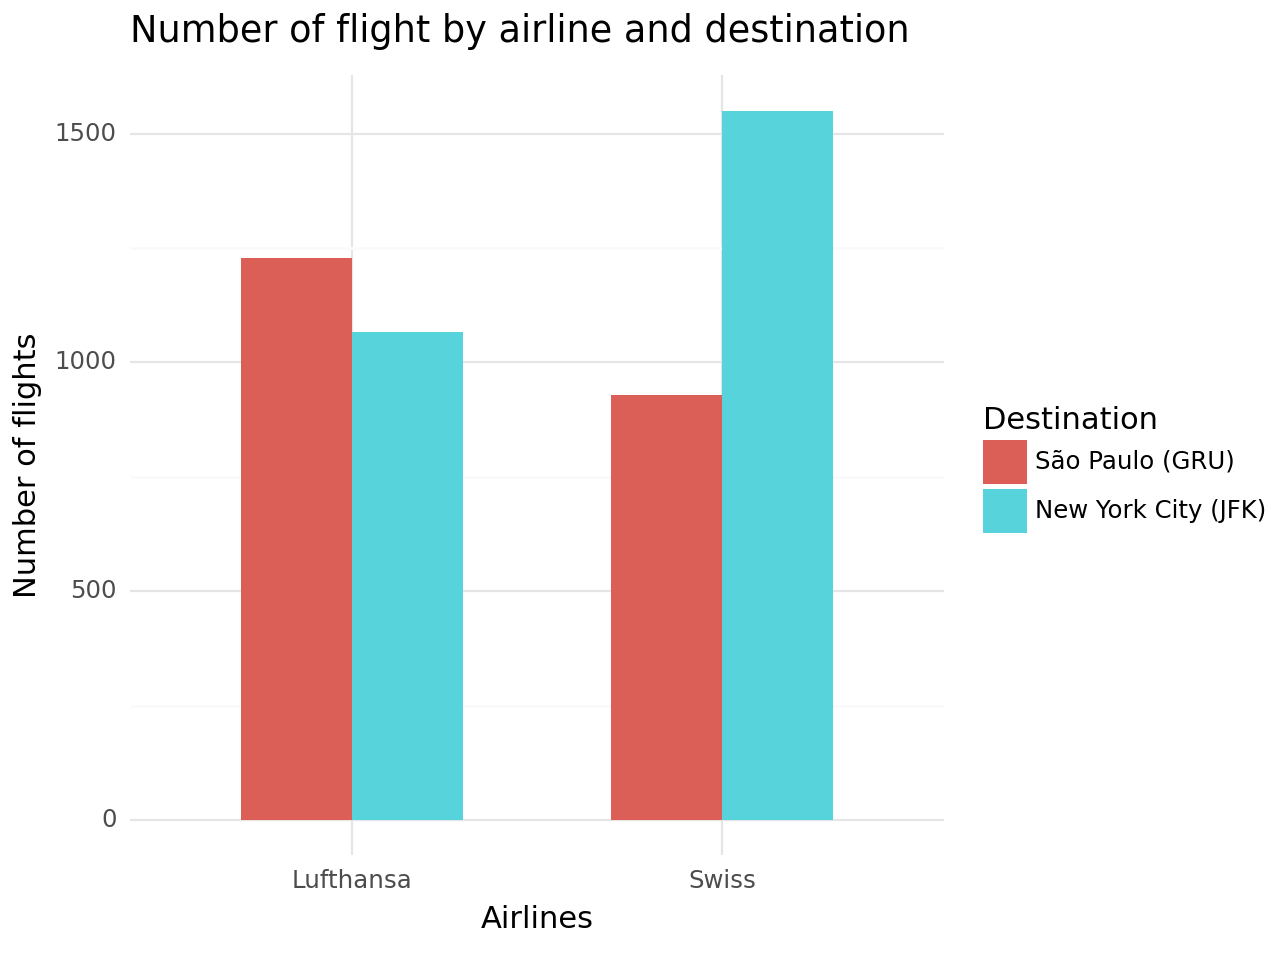

<Figure Size: (640 x 480)>

In [5]:
f1 = (
    ggplot(barplot, aes(x="out_airline_company", y="N", fill="arr_city"))
    + geom_bar(stat="identity", position="dodge", width=0.6, size=0.5)
    + labs(x="Airlines", y="Number of flights", fill="Destination")
    + scale_fill_discrete(labels=("São Paulo (GRU)", "New York City (JFK)"))
    + theme_minimal()
    + ggtitle("Number of flight by airline and destination")
)
f1

#### b. boxplot

In [6]:
lufthansa_nyc = combined_dataset.loc[(combined_dataset.out_airline_company == 'Lufthansa') & (combined_dataset.arr_city=='JFK')]
swiss_nyc = combined_dataset.loc[(combined_dataset.out_airline_company == 'Swiss') & (combined_dataset.arr_city=='JFK')]
lufthansa_sao = combined_dataset.loc[(combined_dataset.out_airline_company == 'Lufthansa') & (combined_dataset.arr_city=='GRU')]
swiss_sao = combined_dataset.loc[(combined_dataset.out_airline_company == 'Swiss') & (combined_dataset.arr_city=='GRU')]

##### b1. boxplots for New York City

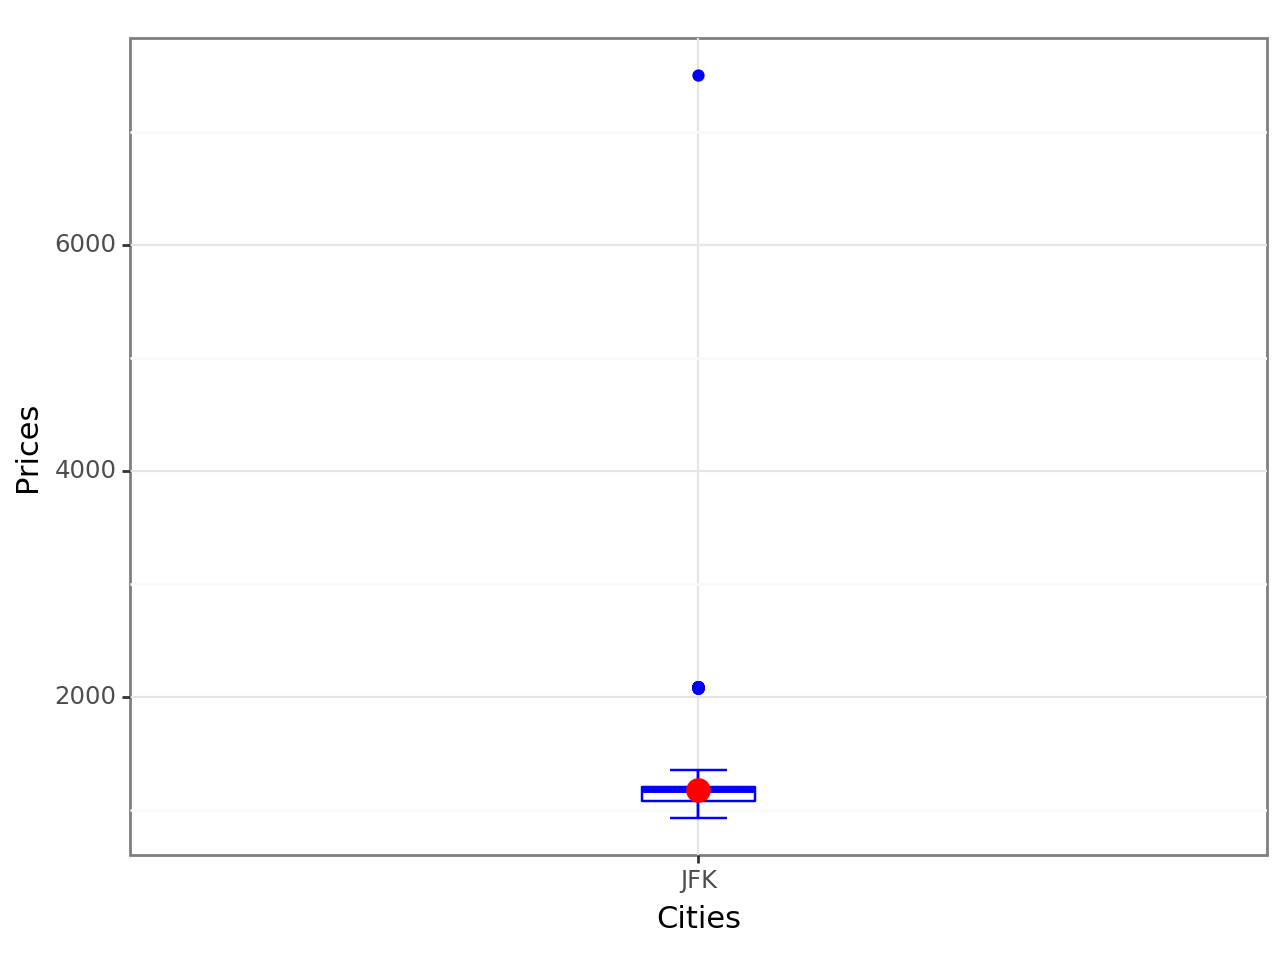

<Figure Size: (640 x 480)>

In [7]:
f2 = (
    ggplot(lufthansa_nyc, aes(y='ticket_price', x='arr_city'))
    + geom_boxplot(color="blue", size=0.5, width=0.1, alpha=0.5)
    + labs(x="Cities", y="Prices")
    + theme_bw()
)
f2

f2 = f2 + stat_boxplot(geom = "errorbar", width = 0.05,  size = 0.5, color = 'blue')
f2

f2 + stat_summary(fun_data="mean_se", geom="point", size=4, color="red", fill="red")

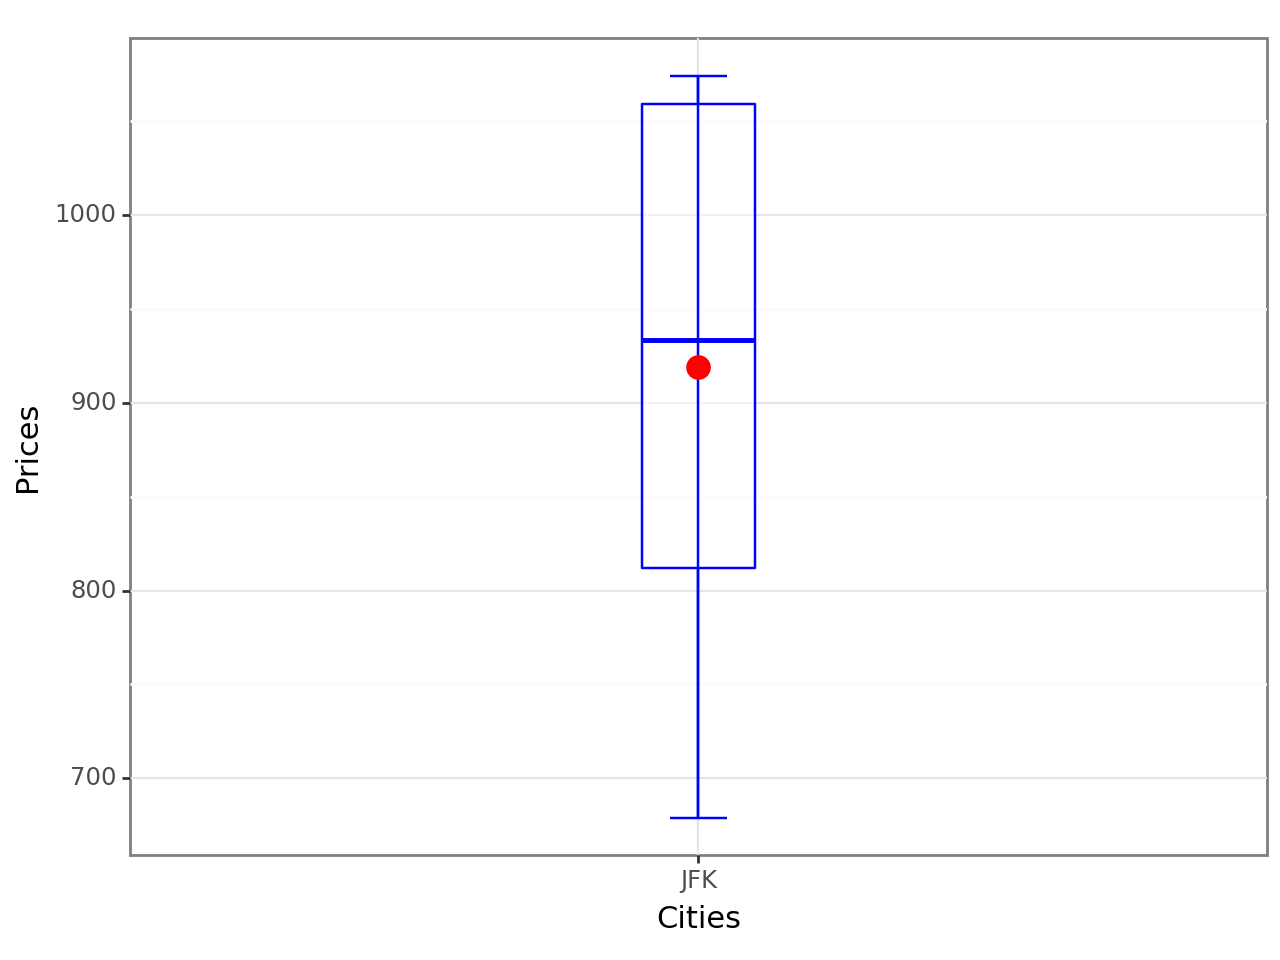

<Figure Size: (640 x 480)>

In [8]:
f3 = (
    ggplot(swiss_nyc, aes(y='ticket_price', x='arr_city'))
    + geom_boxplot(color="blue", size=0.5, width=0.1, alpha=0.5)
    + labs(x="Cities", y="Prices")
    + theme_bw()
)
f3

f3 = f3 + stat_boxplot(geom = "errorbar", width = 0.05,  size = 0.5, color = 'blue')
f3

f3 + stat_summary(fun_data="mean_se", geom="point", size=4, color="red", fill="red")

##### b2. boxplots for São Paulo destination

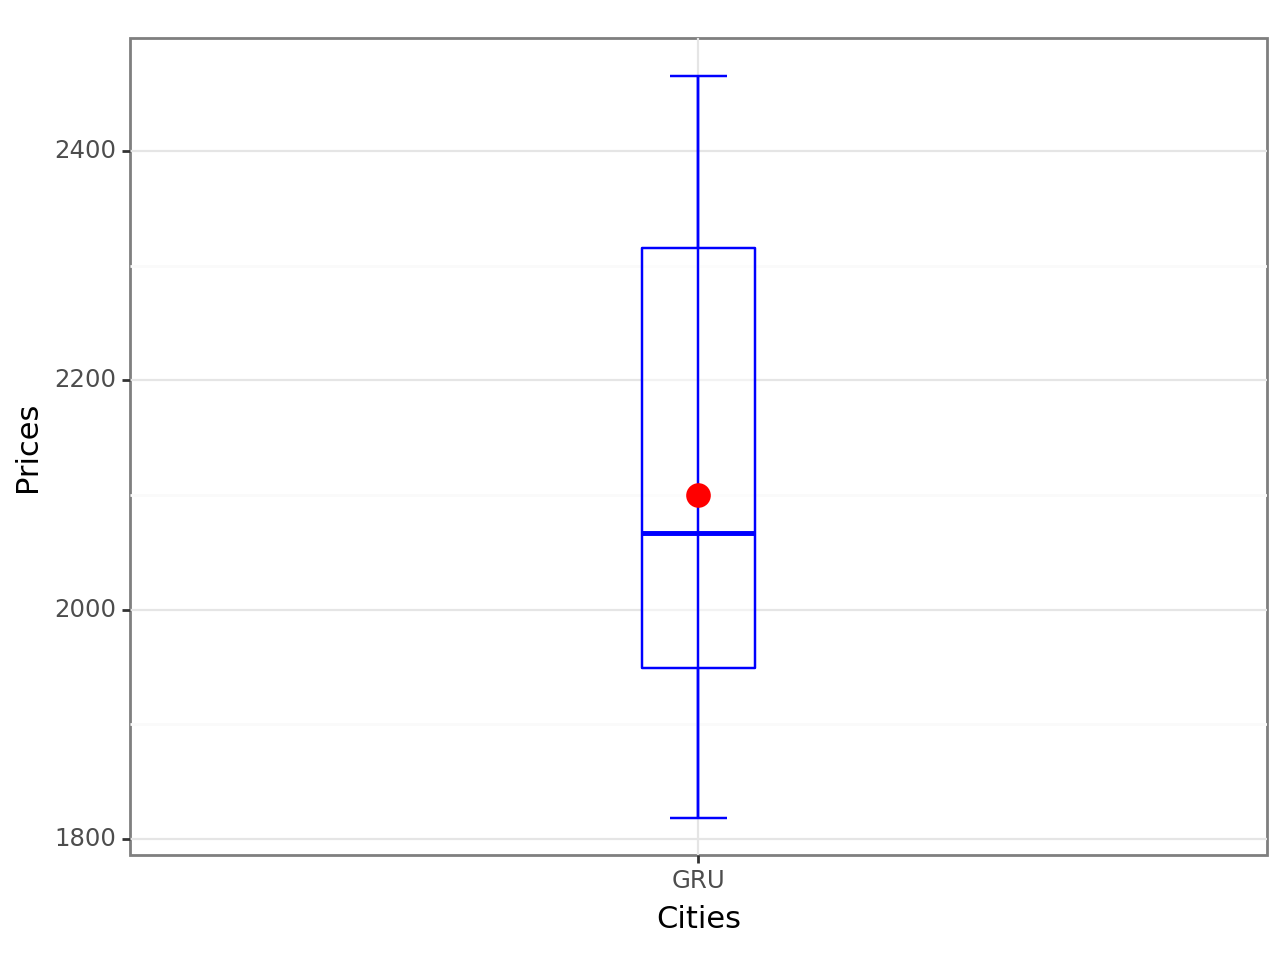

<Figure Size: (640 x 480)>

In [9]:
f4 = (
    ggplot(lufthansa_sao, aes(y='ticket_price', x='arr_city'))
    + geom_boxplot(color="blue", size=0.5, width=0.1, alpha=0.5)
    + labs(x="Cities", y="Prices")
    + theme_bw()
)
f4

f4 = f4 + stat_boxplot(geom = "errorbar", width = 0.05,  size = 0.5, color = 'blue')
f4

f4 + stat_summary(fun_data="mean_se", geom="point", size=4, color="red", fill="red")

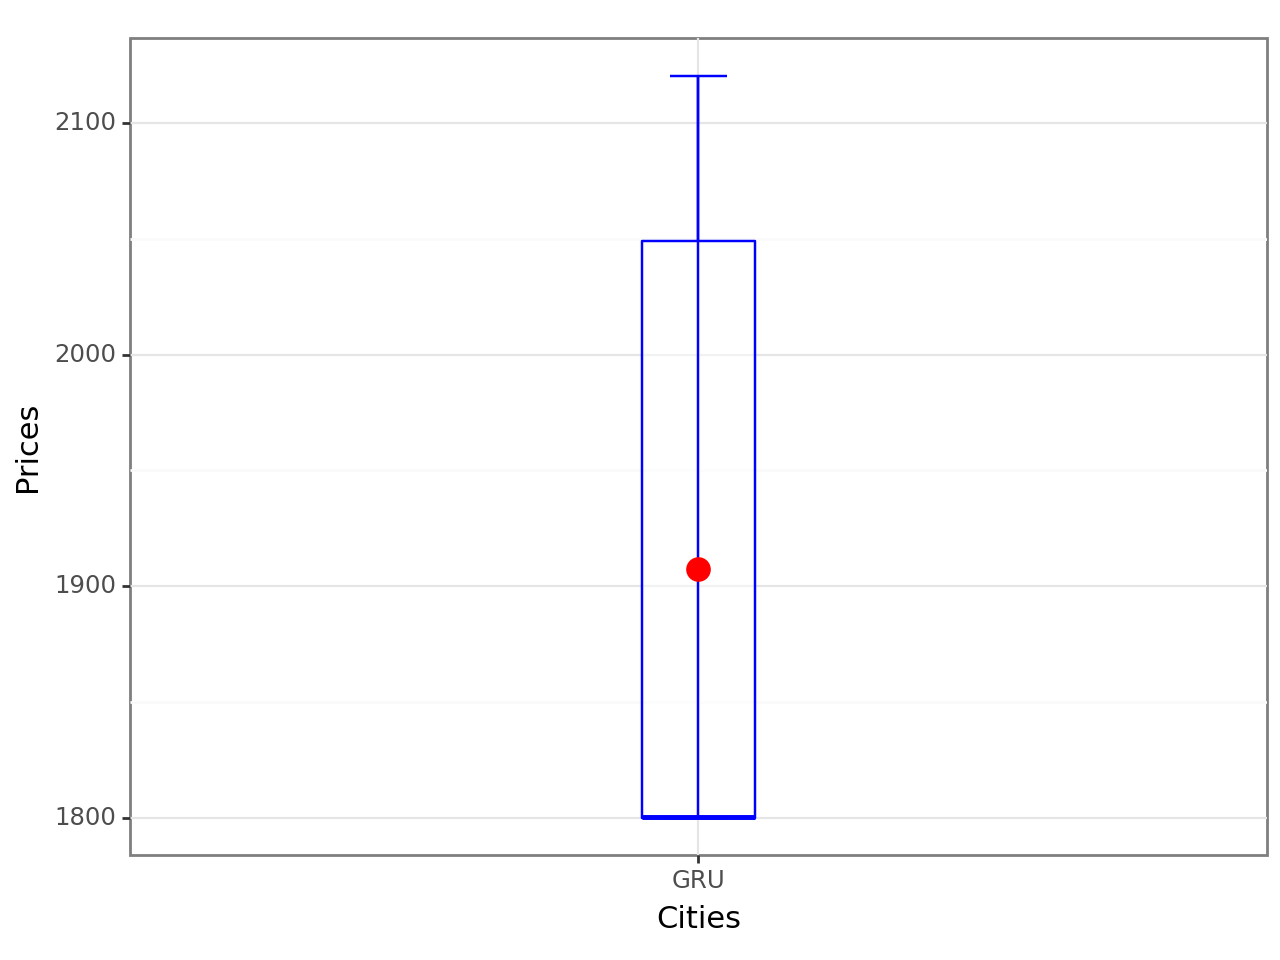

<Figure Size: (640 x 480)>

In [10]:
f5 = (
    ggplot(swiss_sao, aes(y='ticket_price', x='arr_city'))
    + geom_boxplot(color="blue", size=0.5, width=0.1, alpha=0.5)
    + labs(x="Cities", y="Prices")
    + theme_bw()
)
f5

f5 = f5 + stat_boxplot(geom = "errorbar", width = 0.05,  size = 0.5, color = 'blue')
f5

f5 + stat_summary(fun_data="mean_se", geom="point", size=4, color="red", fill="red")

#### c. lineplot

In [11]:
cur_time = datetime.datetime.now()
month = cur_time.strftime('%b')
year=cur_time.strftime('%Y')

##### c1. lineplot for New York City

In [12]:
lineplot_nyc = combined_dataset.loc[(combined_dataset.arr_city=='JFK')].groupby(['out_airline_company','day_scrap', 'hour_scrap'])['ticket_price'].agg(['mean'])
lineplot_nyc = lineplot_nyc.reset_index()

lineplot_nyc['date'] = pd.to_datetime(lineplot_nyc['day_scrap'].astype(str) + ' ' + month + ' ' + year + ' '+ lineplot_nyc['hour_scrap'].astype(str), format='%d %b %Y %H')
lineplot_nyc['date'] = lineplot_nyc['date'].dt.strftime('%d %b %I %p')

In [13]:
lineplot_nyc.head()

,out_airline_company,day_scrap,hour_scrap,mean,date
0,Lufthansa,20,16,1133.220556,20 May 04 PM
1,Lufthansa,20,18,1131.853333,20 May 06 PM
2,Lufthansa,20,20,1105.545000,20 May 08 PM
3,Lufthansa,20,22,1134.216111,20 May 10 PM
4,Lufthansa,21,8,1129.710000,21 May 08 AM


In [14]:
date_nyc = lineplot_nyc[lineplot_nyc.out_airline_company == 'Lufthansa']['date'].tolist()
price_lufthansa_nyc = lineplot_nyc[lineplot_nyc.out_airline_company == 'Lufthansa']['mean'].tolist()
price_swiss_nyc = lineplot_nyc[lineplot_nyc.out_airline_company == 'Swiss']['mean'].tolist()

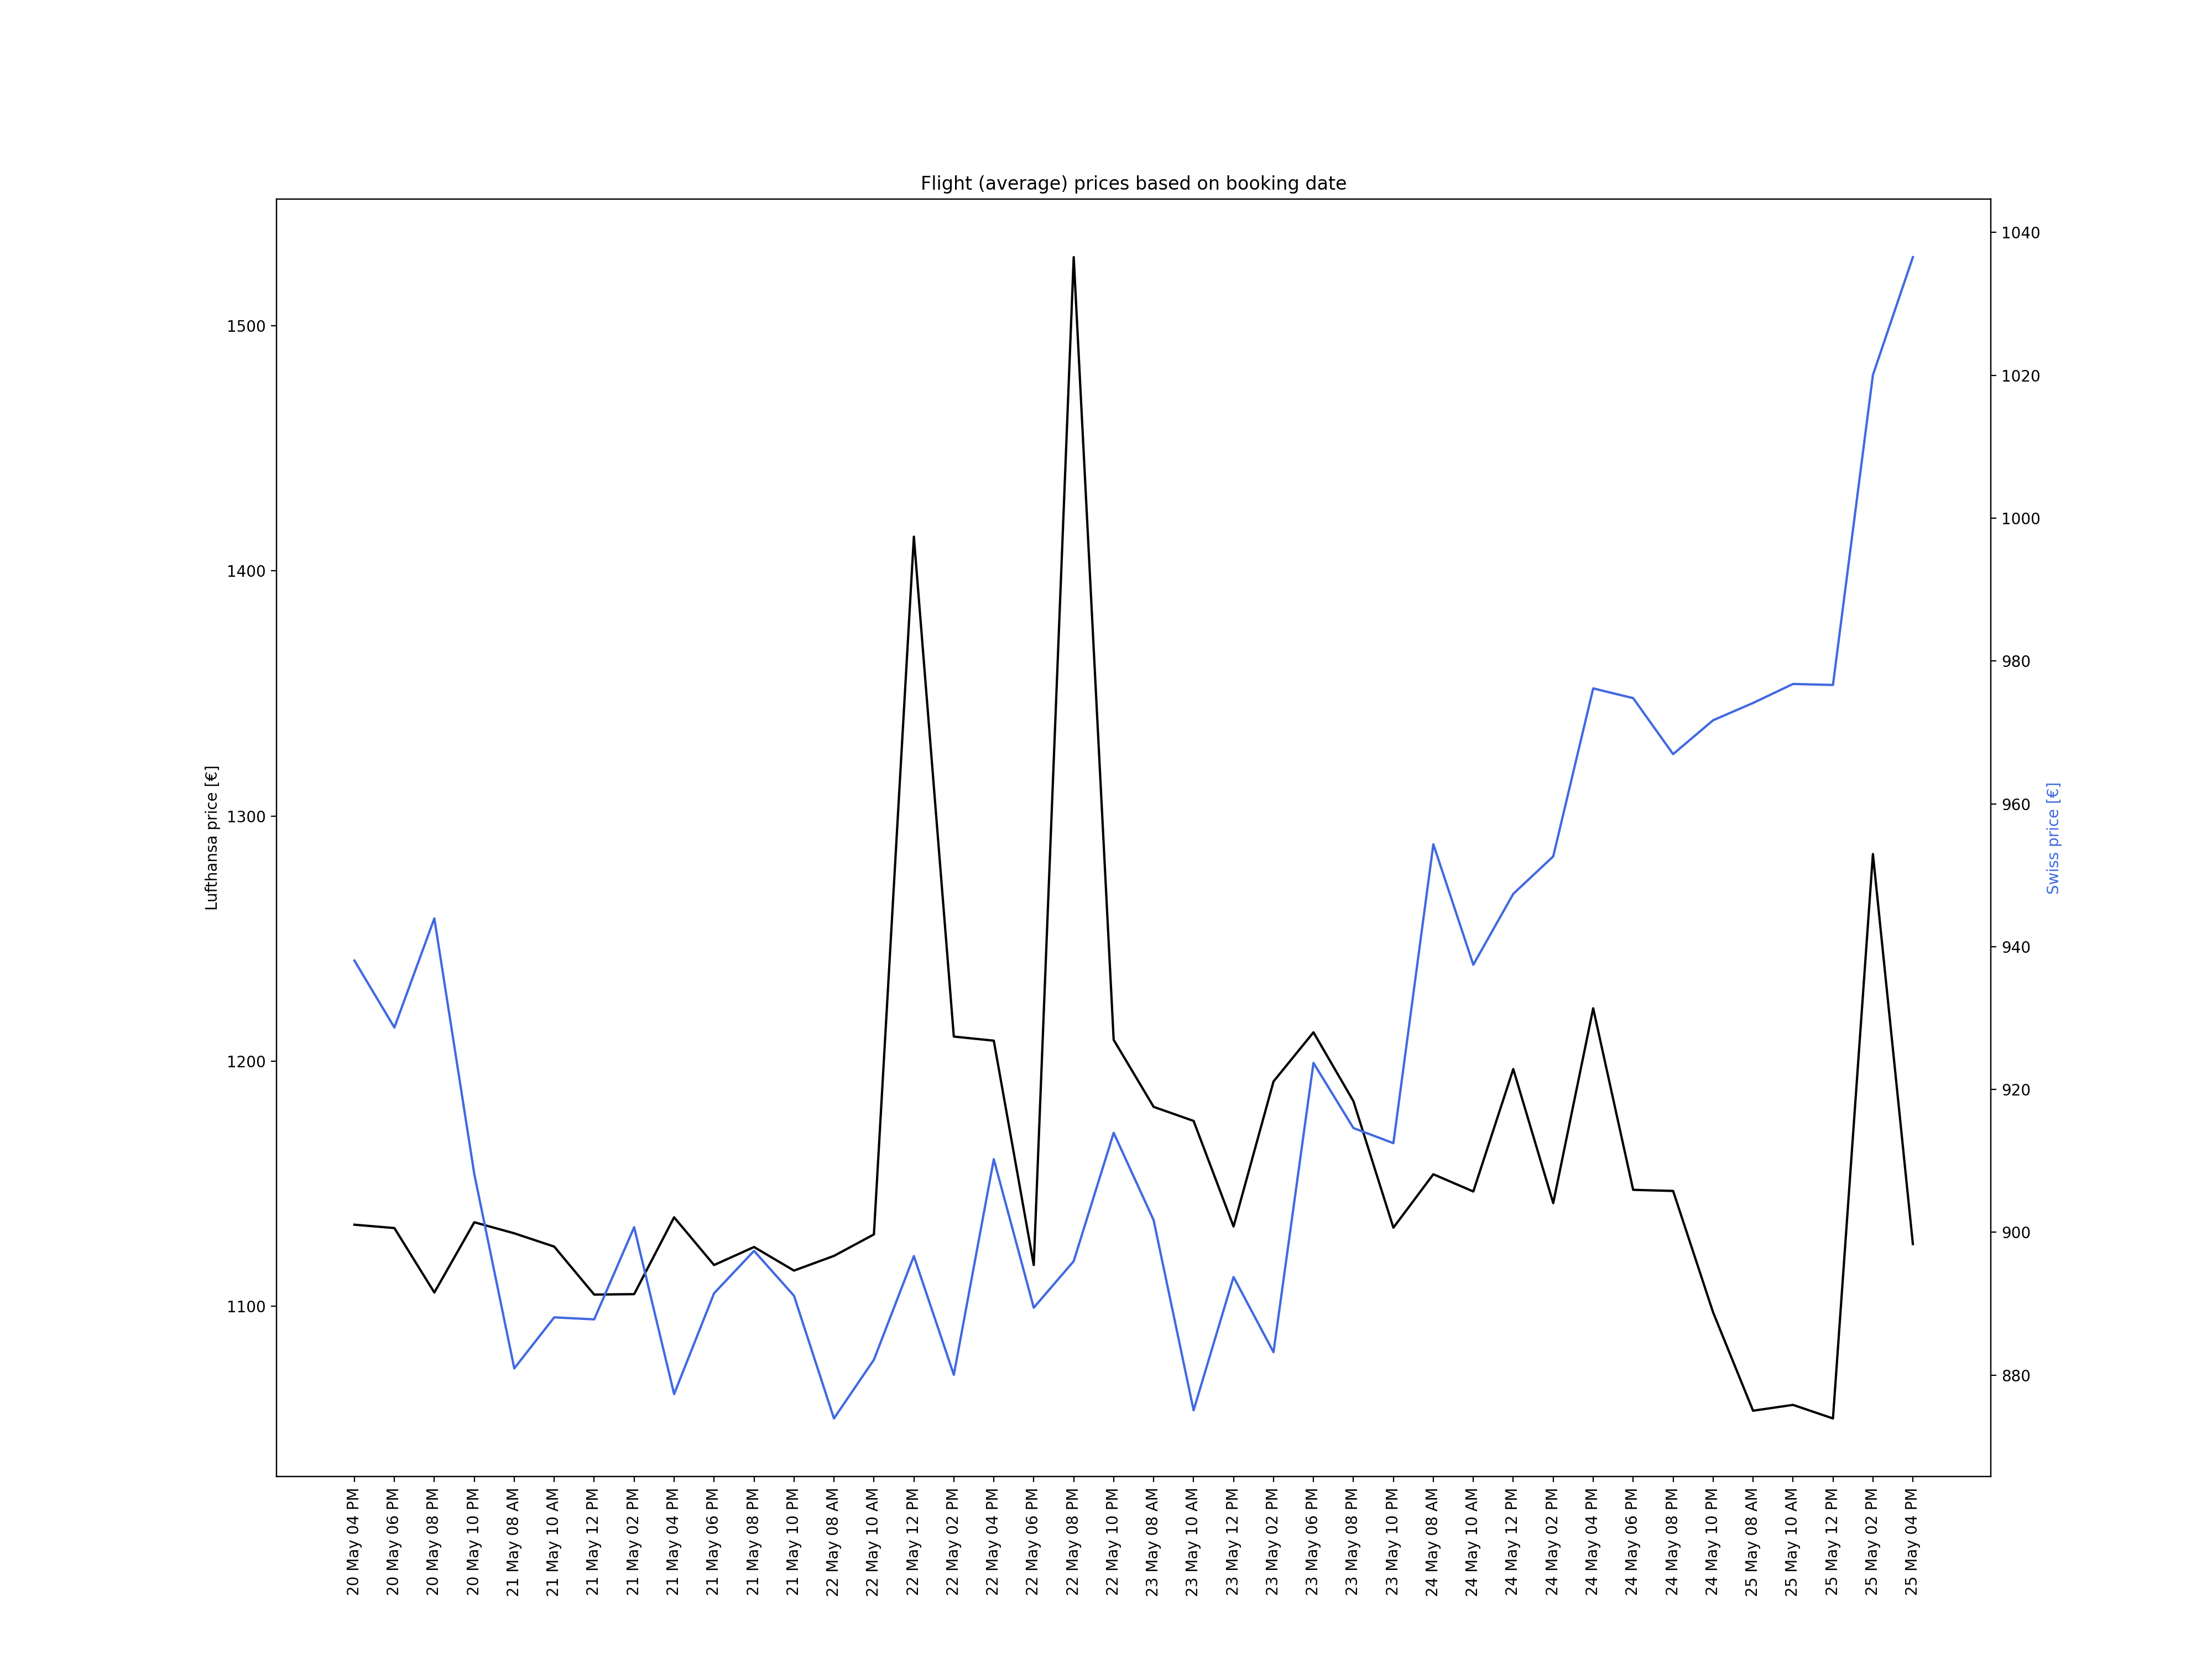

In [15]:
fig, ax1 = plt.subplots(figsize = (20,15))

ax1.plot(date_nyc, price_lufthansa_nyc, color = 'k')
plt.xticks(rotation=90)
ax1.set_ylabel("Lufthansa price [€]", color = 'k')
ax2 = ax1.twinx()
ax2.plot(date_nyc, price_swiss_nyc, color = "royalblue")
ax2.set_ylabel("Swiss price [€]", color = "royalblue")
plt.xticks(rotation=90)
plt.title('Flight (average) prices based on booking date');

##### c2. lineplot for São Paulo

In [16]:
lineplot_sao = combined_dataset.loc[(combined_dataset.arr_city=='GRU')].groupby(['out_airline_company','day_scrap', 'hour_scrap'])['ticket_price'].agg(['mean'])
lineplot_sao = lineplot_sao.reset_index()

lineplot_sao['date'] = pd.to_datetime(lineplot_sao['day_scrap'].astype(str) + ' ' + month + ' ' + year + ' '+ lineplot_sao['hour_scrap'].astype(str), format='%d %b %Y %H')
lineplot_sao['date'] = lineplot_sao['date'].dt.strftime('%d %b %I %p')

In [17]:
lineplot_sao.head()

,out_airline_company,day_scrap,hour_scrap,mean,date
0,Lufthansa,20,16,1910.573437,20 May 04 PM
1,Lufthansa,20,18,1910.573437,20 May 06 PM
2,Lufthansa,20,20,1905.350000,20 May 08 PM
3,Lufthansa,20,22,1902.225000,20 May 10 PM
4,Lufthansa,21,8,1908.475000,21 May 08 AM


In [18]:
date_sao = lineplot_sao[lineplot_nyc.out_airline_company == 'Lufthansa']['date'].tolist()
price_lufthansa_sao = lineplot_sao[lineplot_nyc.out_airline_company == 'Lufthansa']['mean'].tolist()
price_swiss_sao = lineplot_sao[lineplot_nyc.out_airline_company == 'Swiss']['mean'].tolist()

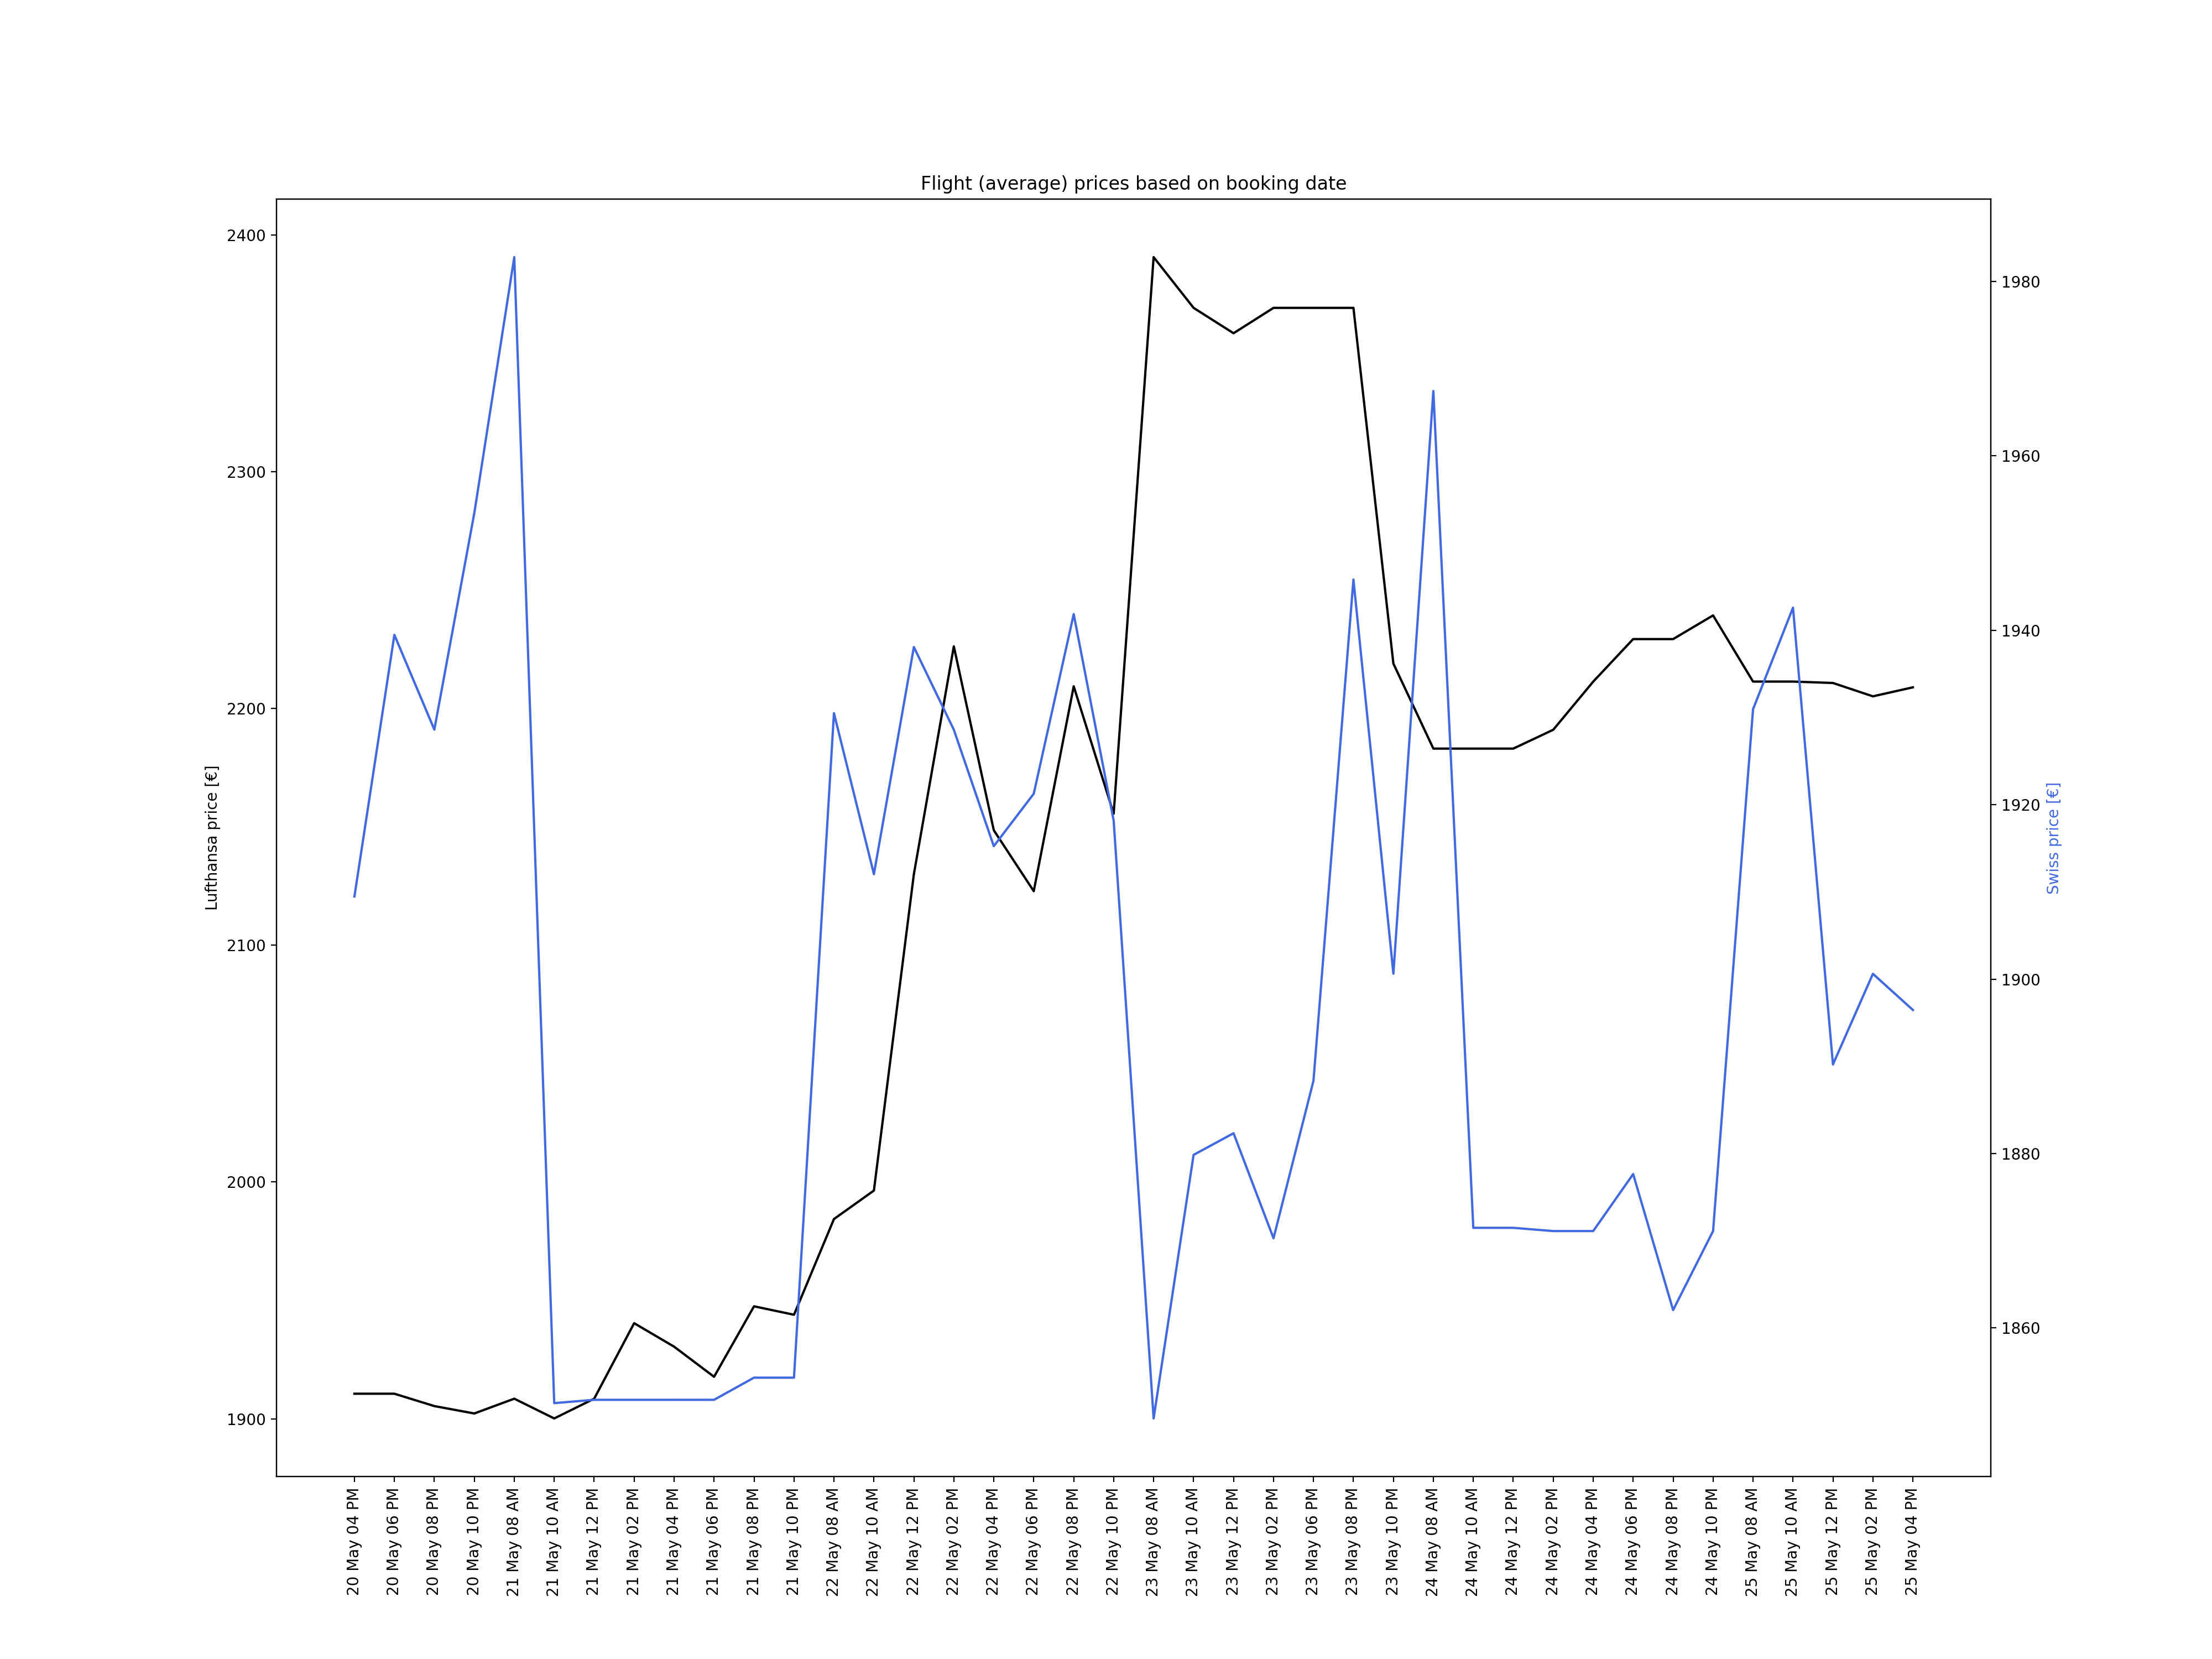

In [19]:
fig, ax1 = plt.subplots(figsize = (20,15))

ax1.plot(date_sao, price_lufthansa_sao, color = 'k')
plt.xticks(rotation=90)
ax1.set_ylabel("Lufthansa price [€]", color = 'k')
ax2 = ax1.twinx()
ax2.plot(date_sao, price_swiss_sao, color = "royalblue")
ax2.set_ylabel("Swiss price [€]", color = "royalblue")
plt.xticks(rotation=90)
plt.title('Flight (average) prices based on booking date');

#### d. scatter plot

In [20]:
combined_dataset['tot_duration'] = combined_dataset["out_duration"] + combined_dataset["in_duration"]

##### d1. scatter plot for New York City

In [21]:
scatterplot_nyc = combined_dataset.loc[(combined_dataset.arr_city=='JFK')].groupby(['out_airline_company','tot_duration'])['ticket_price'].mean().reset_index(name='price')
scatterplot_nyc

,out_airline_company,tot_duration,price
0,Lufthansa,0 days 21:05:00,1329.144423
1,Lufthansa,0 days 21:10:00,1330.365263
2,Lufthansa,0 days 21:30:00,1313.796667
3,Lufthansa,0 days 21:35:00,1090.178750
4,Lufthansa,0 days 21:50:00,1159.105556
...,...,...,...
78,Swiss,2 days 08:55:00,774.360556
79,Swiss,2 days 09:20:00,720.120000
80,Swiss,2 days 10:10:00,748.146296
81,Swiss,2 days 12:20:00,802.640000


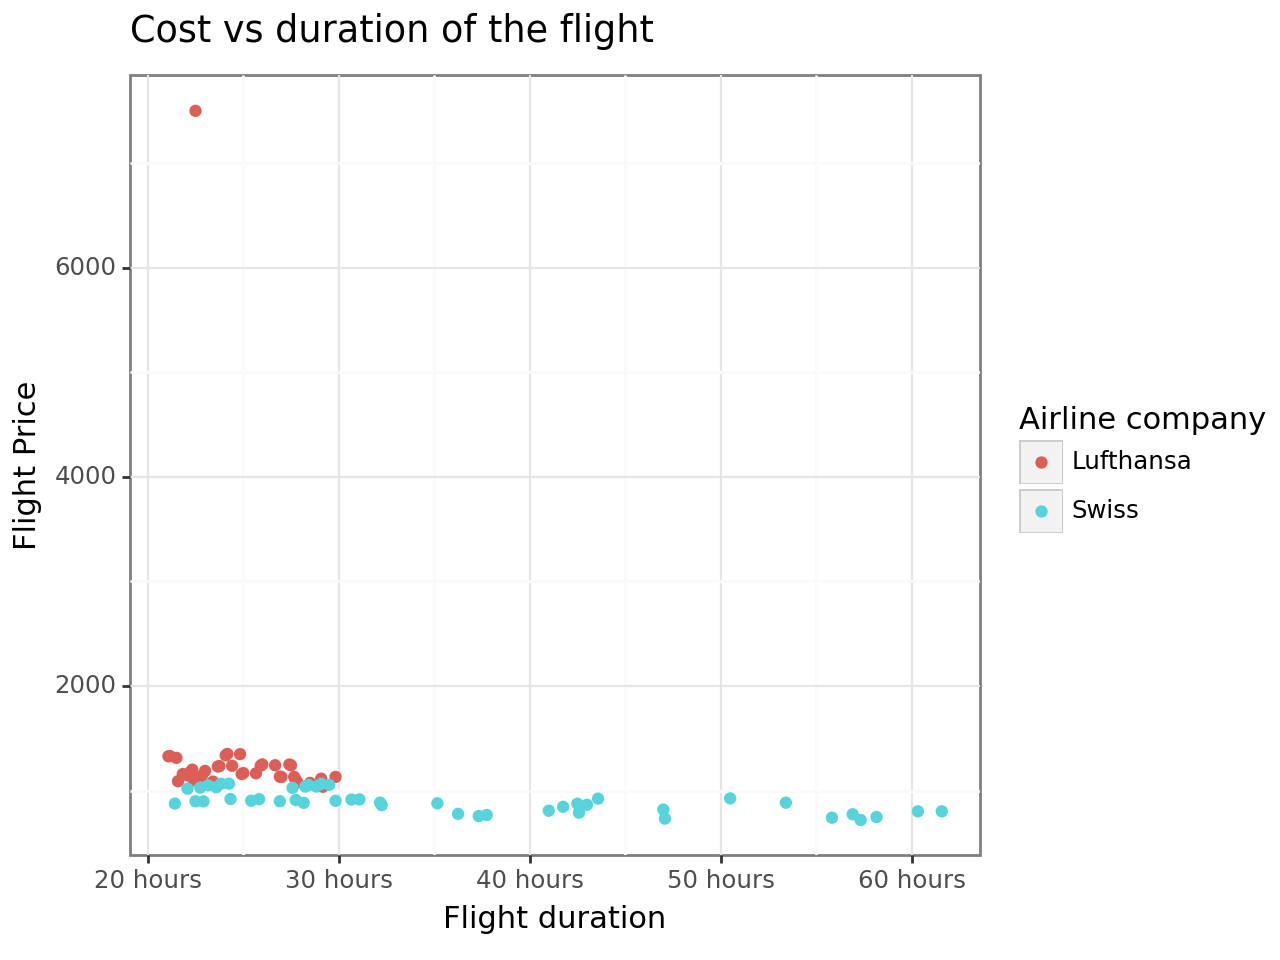

<Figure Size: (640 x 480)>

In [22]:
f6= (ggplot(scatterplot_nyc, aes(x='tot_duration', y='price', color='out_airline_company')) + \
    geom_point() + \
    labs(title='Cost vs duration of the flight',
         x='Flight duration',
         y='Flight Price',
         color='Airline company') + \
    theme_bw()
)
f6

##### d2. scatter plot for São Paulo

In [23]:
scatterplot_sao = combined_dataset.loc[(combined_dataset.arr_city=='GRU')].groupby(['out_airline_company','tot_duration'])['ticket_price'].mean().reset_index(name='price')
scatterplot_sao.head()

,out_airline_company,tot_duration,price
0,Lufthansa,1 days 04:25:00,2315.740250
1,Lufthansa,1 days 05:15:00,2343.632750
2,Lufthansa,1 days 06:20:00,2321.906667
3,Lufthansa,1 days 06:25:00,2281.888250
4,Lufthansa,1 days 07:10:00,2334.200000


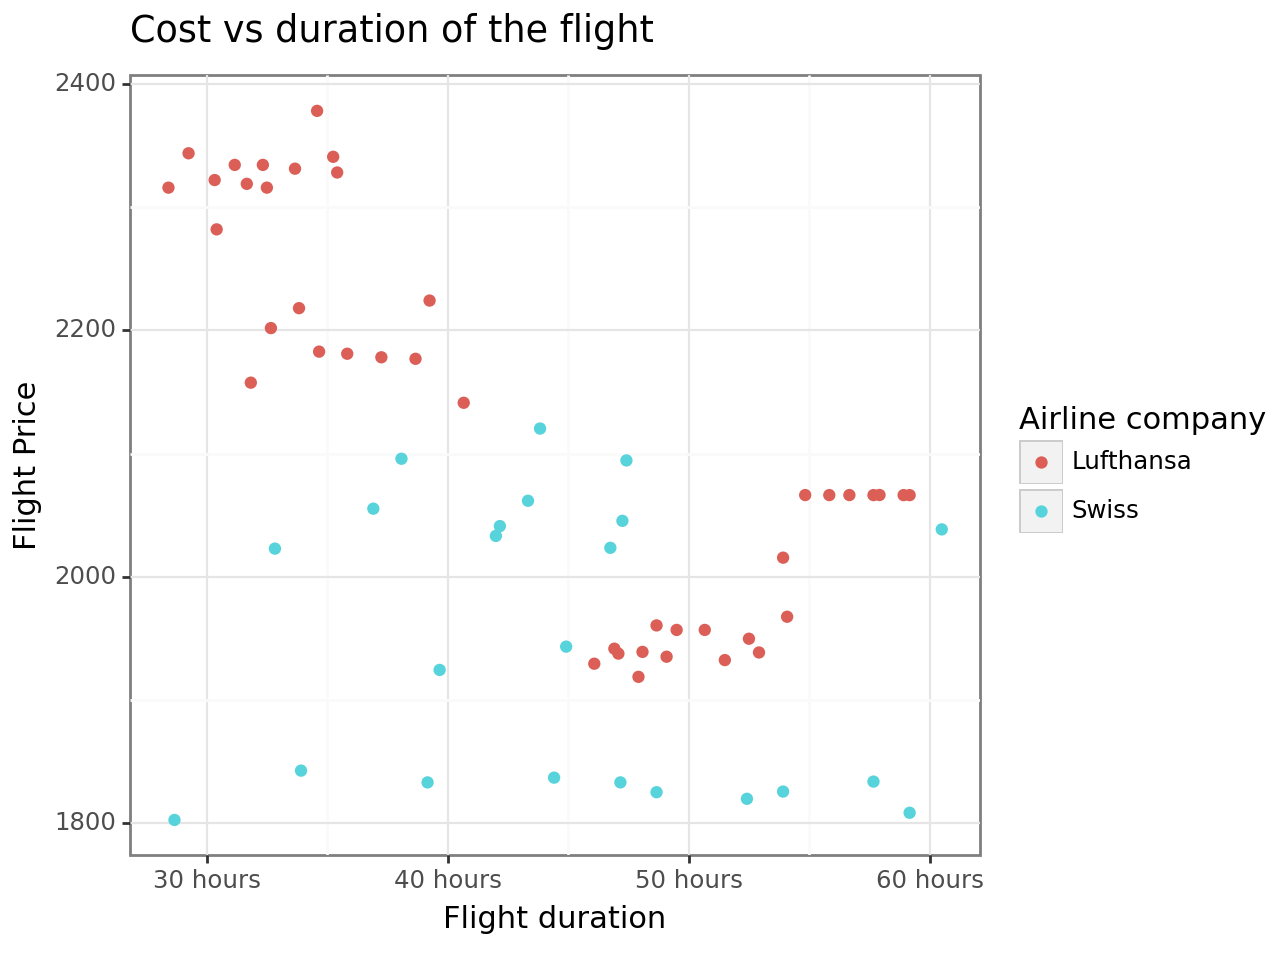

<Figure Size: (640 x 480)>

In [24]:
f7= (ggplot(scatterplot_sao, aes(x='tot_duration', y='price', color='out_airline_company')) + \
    geom_point() + \
    labs(title='Cost vs duration of the flight',
         x='Flight duration',
         y='Flight Price',
         color='Airline company') + \
    theme_bw()
)
f7

#### e. heatmap

In [25]:
# price and duration

numerical_nyc = combined_dataset.loc[combined_dataset.arr_city=='JFK'][['ticket_price', 'tot_duration','out_dep_time','out_arr_time','in_dep_time','in_arr_time']]


numerical_nyc['out_dep_time'] = pd.to_datetime(numerical_nyc['out_dep_time'], format='%H:%M')
numerical_nyc['out_arr_time'] = pd.to_datetime(numerical_nyc['out_arr_time'], format='%H:%M')
numerical_nyc['in_dep_time'] = pd.to_datetime(numerical_nyc['out_arr_time'], format='%H:%M')
numerical_nyc['in_arr_time'] = pd.to_datetime(numerical_nyc['out_arr_time'], format='%H:%M')

numerical_nyc

,ticket_price,tot_duration,out_dep_time,out_arr_time,in_dep_time,in_arr_time
0,1176.01,0 days 21:05:00,1900-01-01 09:35:00,1900-01-01 15:00:00,1900-01-01 15:00:00,1900-01-01 15:00:00
1,923.39,1 days 05:10:00,1900-01-01 13:15:00,1900-01-01 20:05:00,1900-01-01 20:05:00,1900-01-01 20:05:00
2,1176.01,0 days 21:50:00,1900-01-01 08:50:00,1900-01-01 15:00:00,1900-01-01 15:00:00,1900-01-01 15:00:00
3,1176.01,0 days 22:05:00,1900-01-01 09:35:00,1900-01-01 15:00:00,1900-01-01 15:00:00,1900-01-01 15:00:00
4,1176.01,0 days 22:15:00,1900-01-01 09:35:00,1900-01-01 15:00:00,1900-01-01 15:00:00,1900-01-01 15:00:00
...,...,...,...,...,...,...
2611,1074.48,1 days 04:15:00,1900-01-01 09:45:00,1900-01-01 16:15:00,1900-01-01 16:15:00,1900-01-01 16:15:00
2612,1058.95,1 days 04:50:00,1900-01-01 06:55:00,1900-01-01 12:45:00,1900-01-01 12:45:00,1900-01-01 12:45:00
2613,1074.48,1 days 04:25:00,1900-01-01 06:55:00,1900-01-01 12:45:00,1900-01-01 12:45:00,1900-01-01 12:45:00
2614,1058.95,1 days 05:30:00,1900-01-01 09:45:00,1900-01-01 16:15:00,1900-01-01 16:15:00,1900-01-01 16:15:00


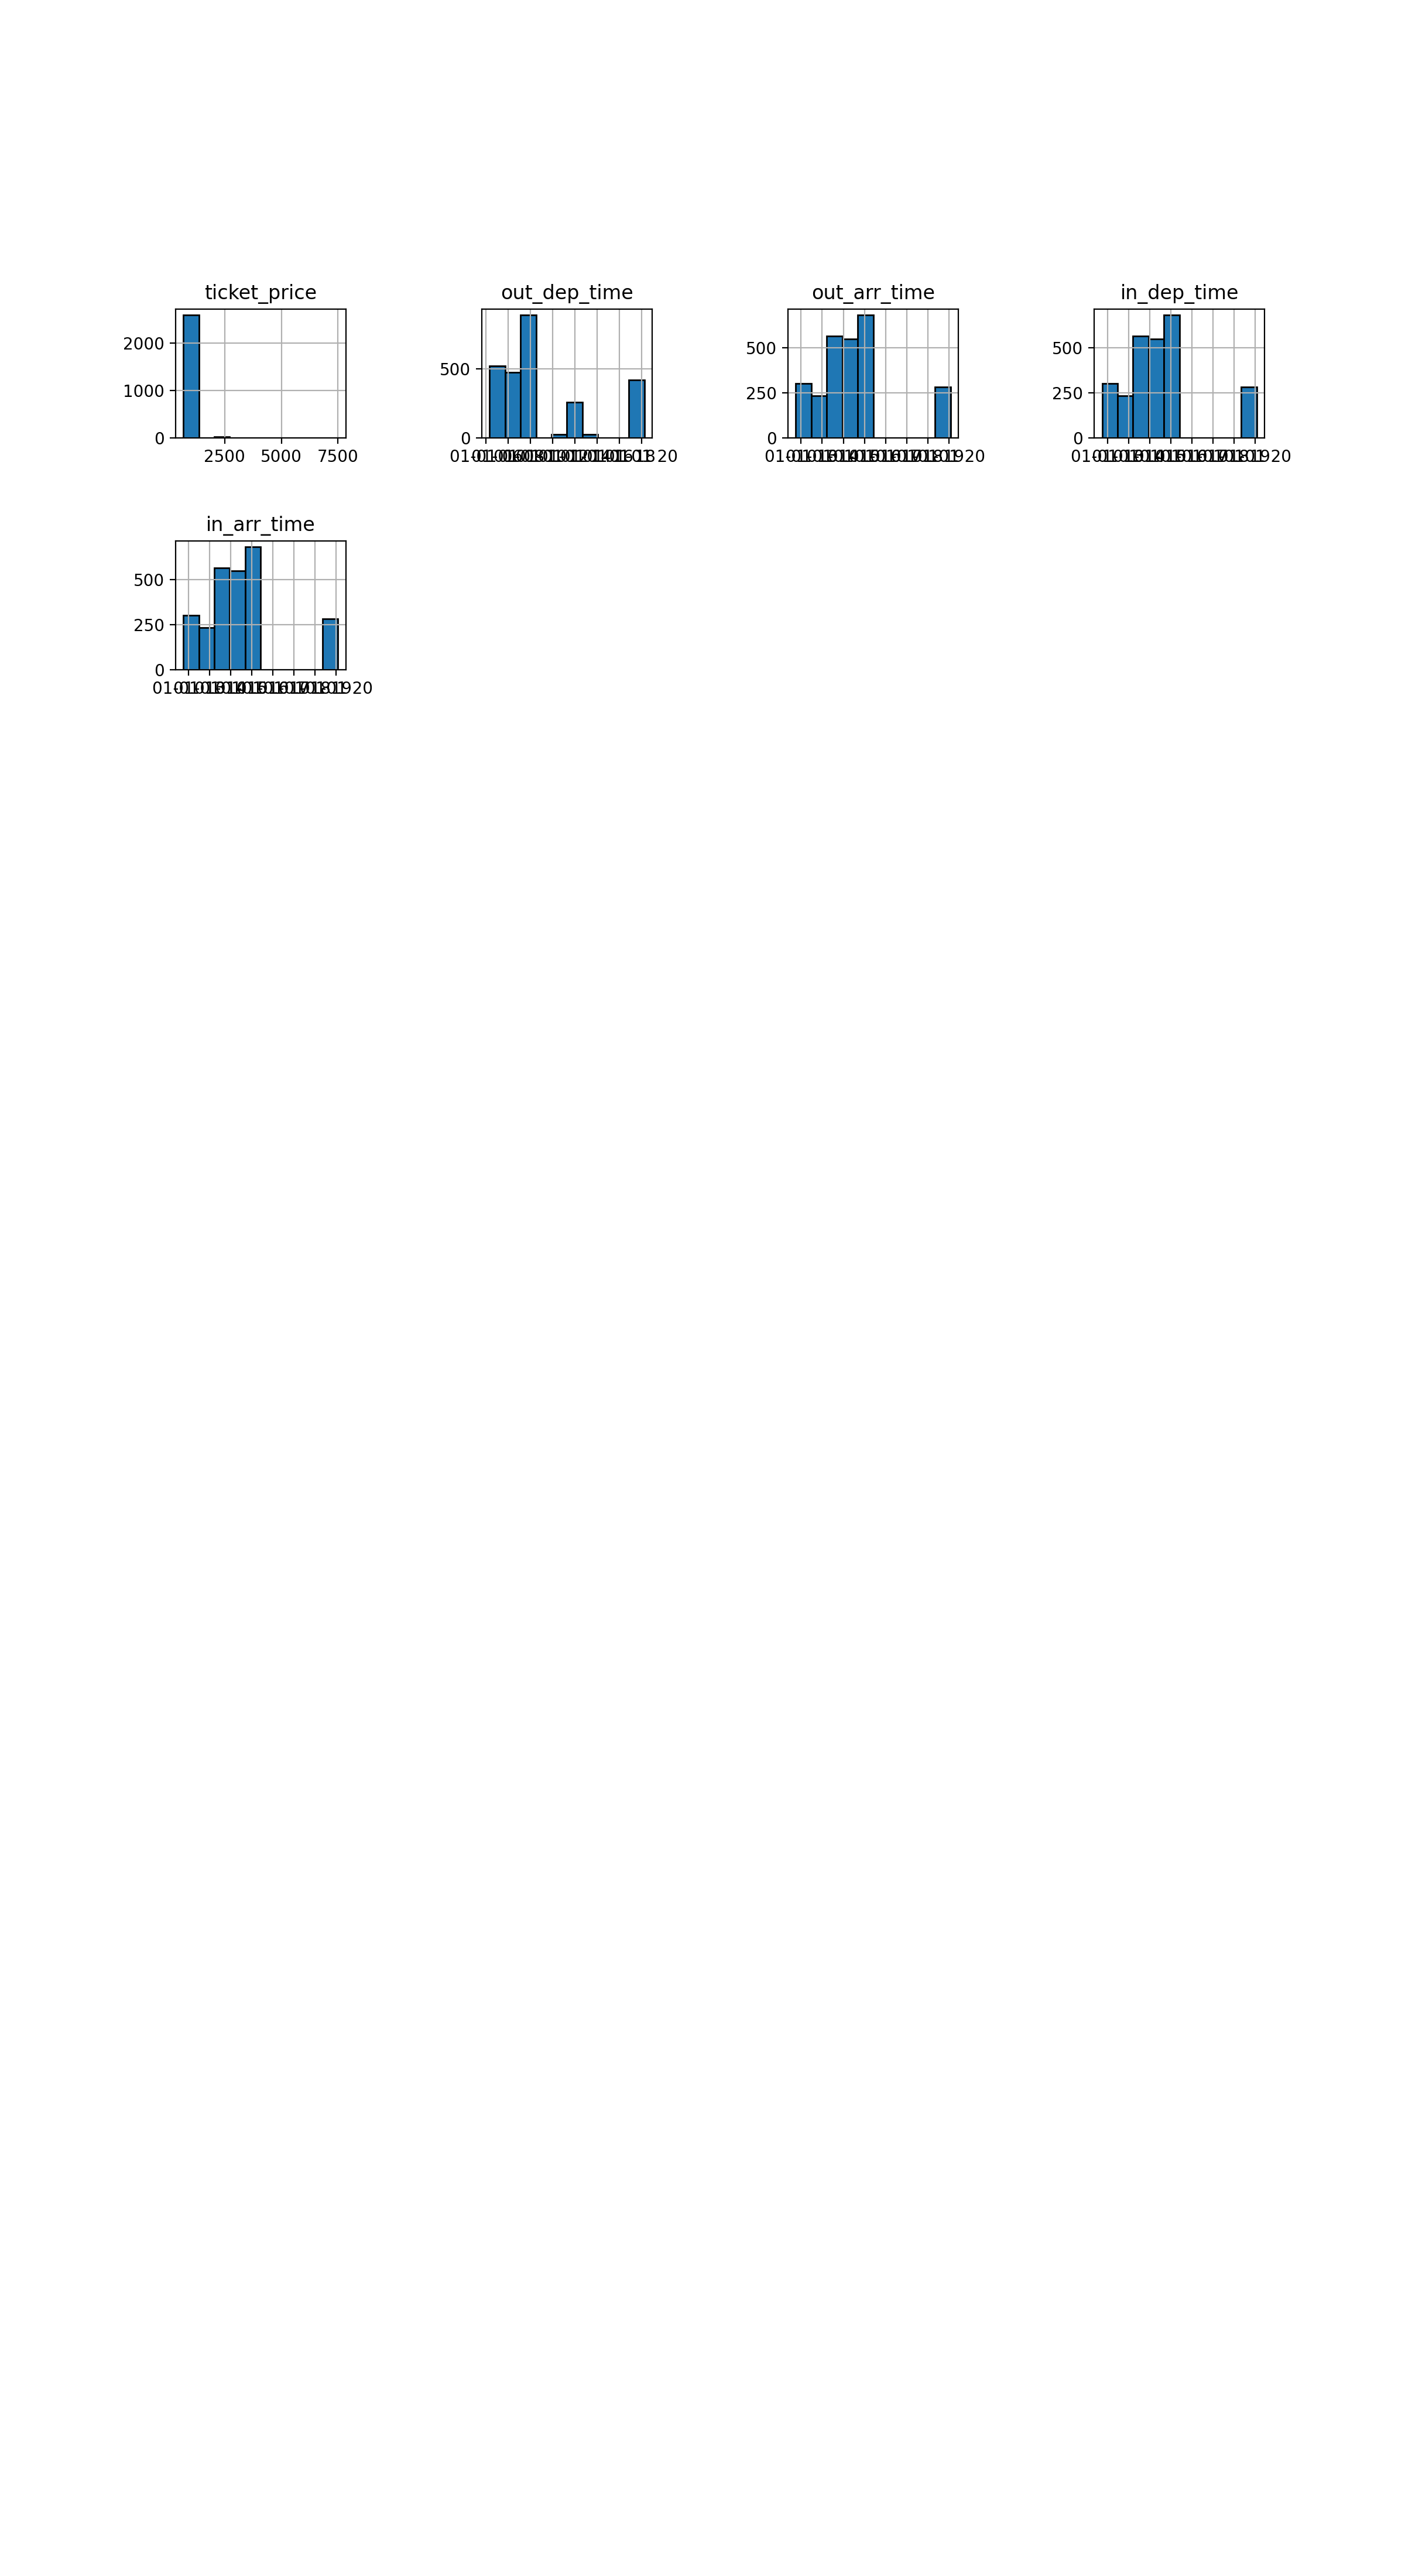

In [26]:
numerical_nyc.hist(bins=10, figsize=(12, 22), edgecolor="black",
                    layout=(9, 4))
plt.subplots_adjust(hspace=0.8, wspace=0.8)

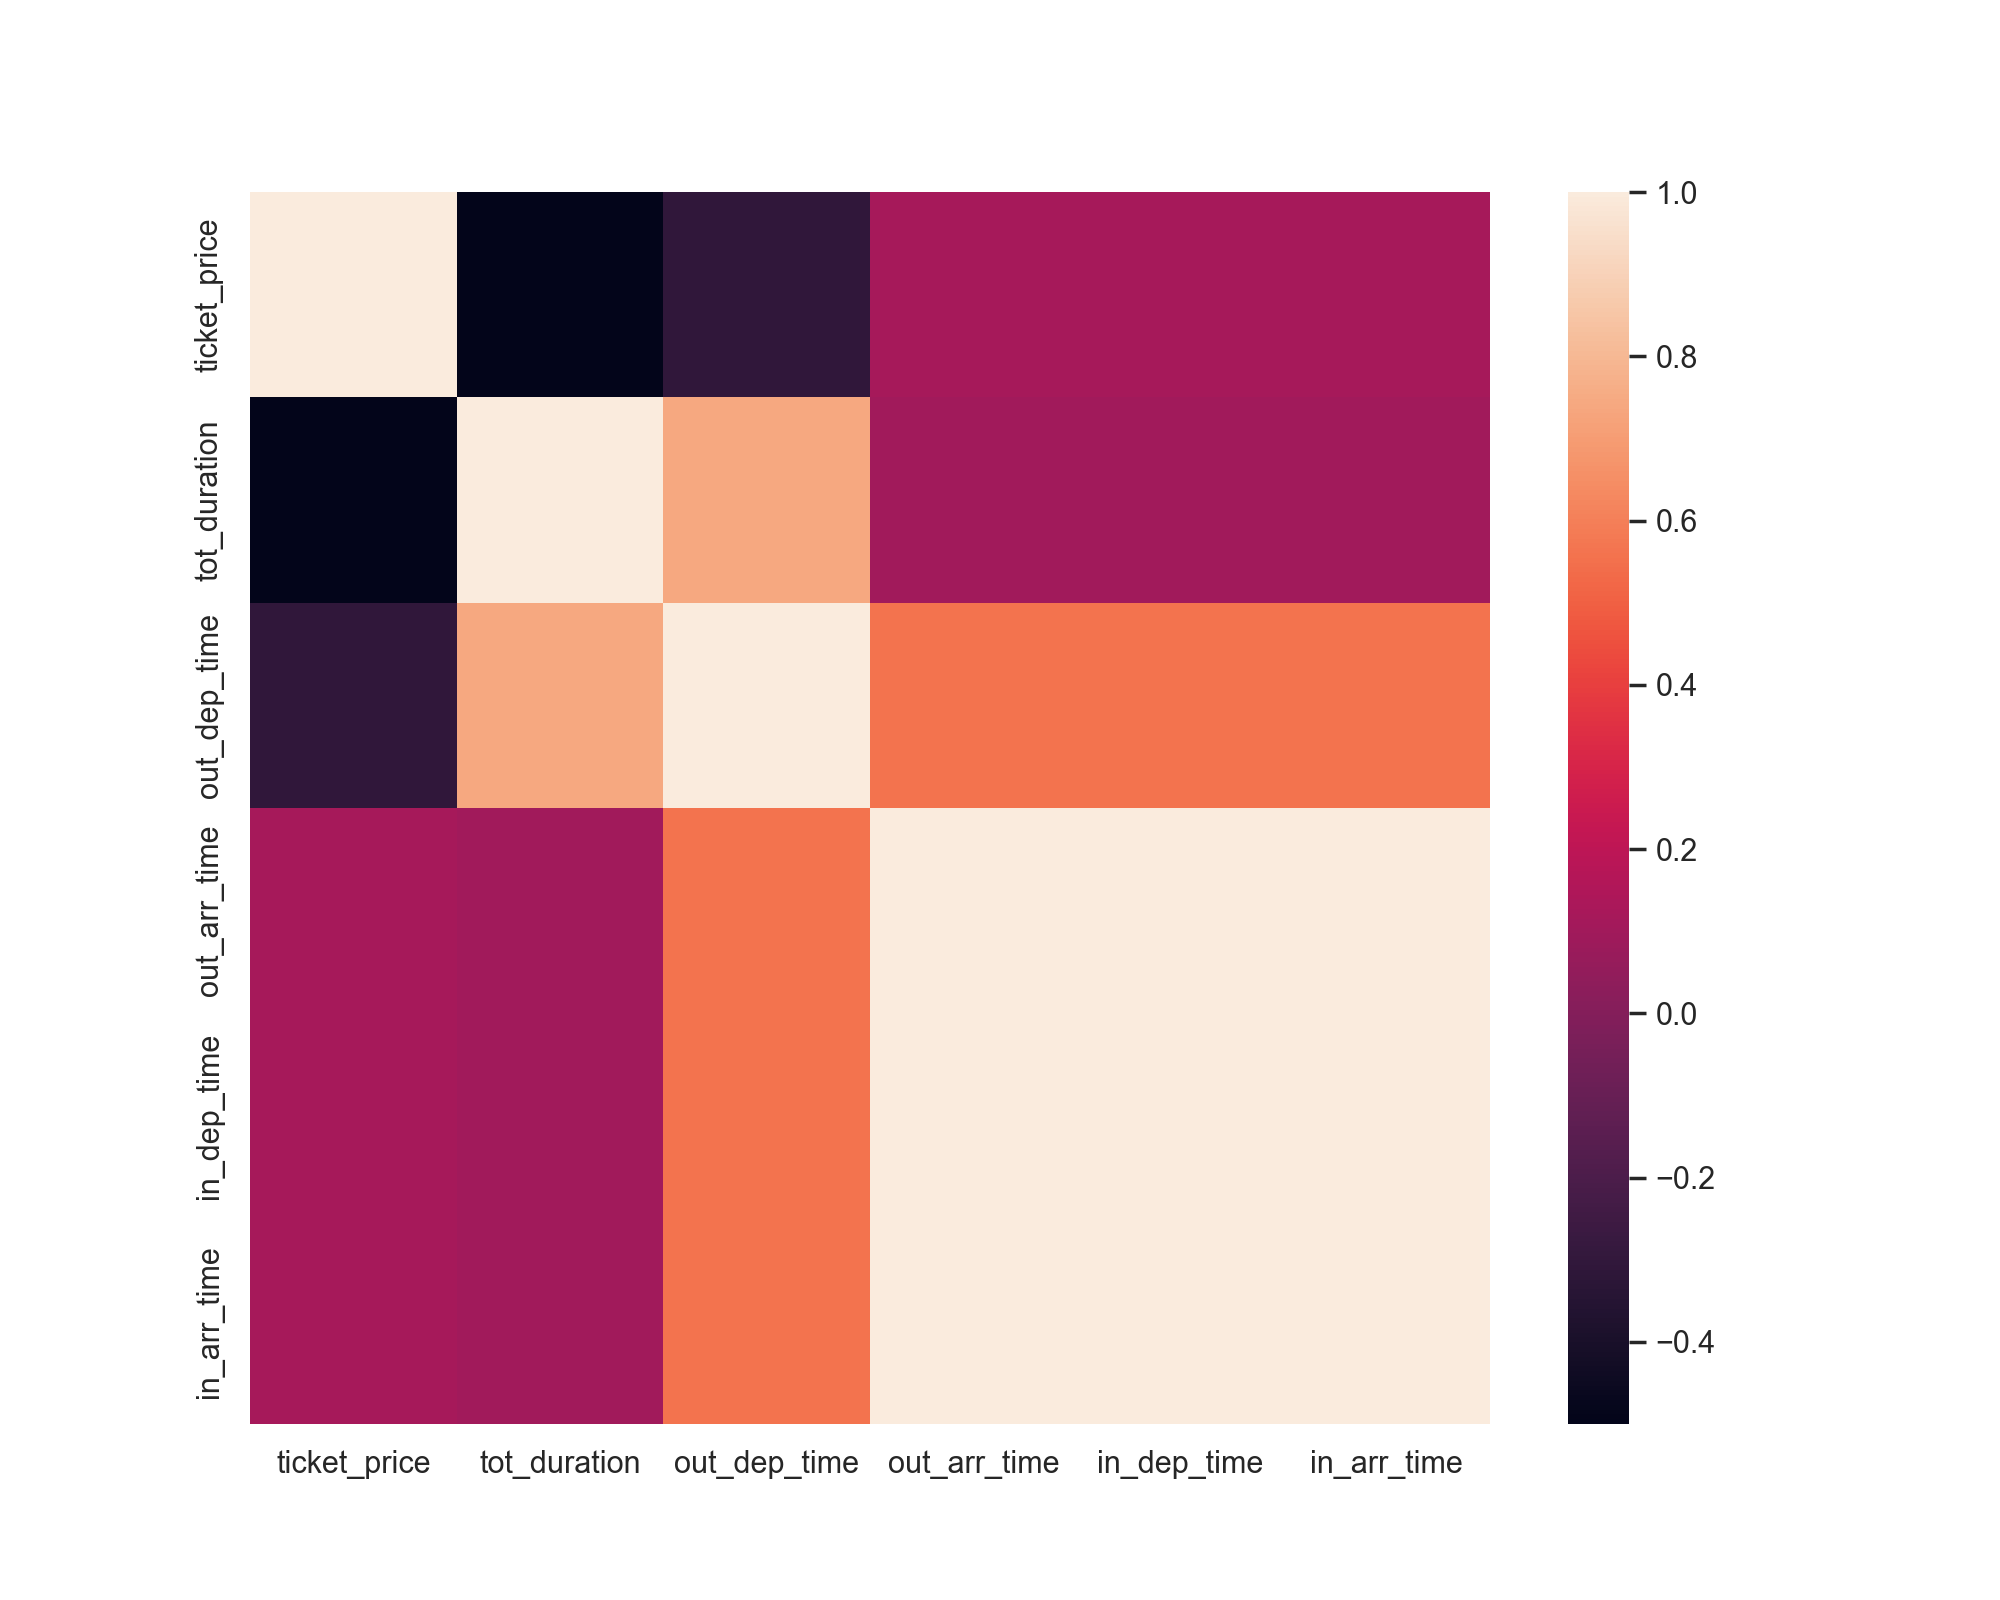

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = numerical_nyc.corr().round(2)
sns.heatmap(correlation_matrix) #annot=True
plt.show()

In [28]:
# price and duration
numerical_sao = combined_dataset.loc[combined_dataset.arr_city=='GRU'][['ticket_price', 'out_duration', 'in_duration']]
numerical_sao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2156 entries, 2616 to 4771
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   ticket_price  2156 non-null   float64        
 1   out_duration  2156 non-null   timedelta64[ns]
 2   in_duration   2156 non-null   timedelta64[ns]
dtypes: float64(1), timedelta64[ns](2)
memory usage: 67.4 KB


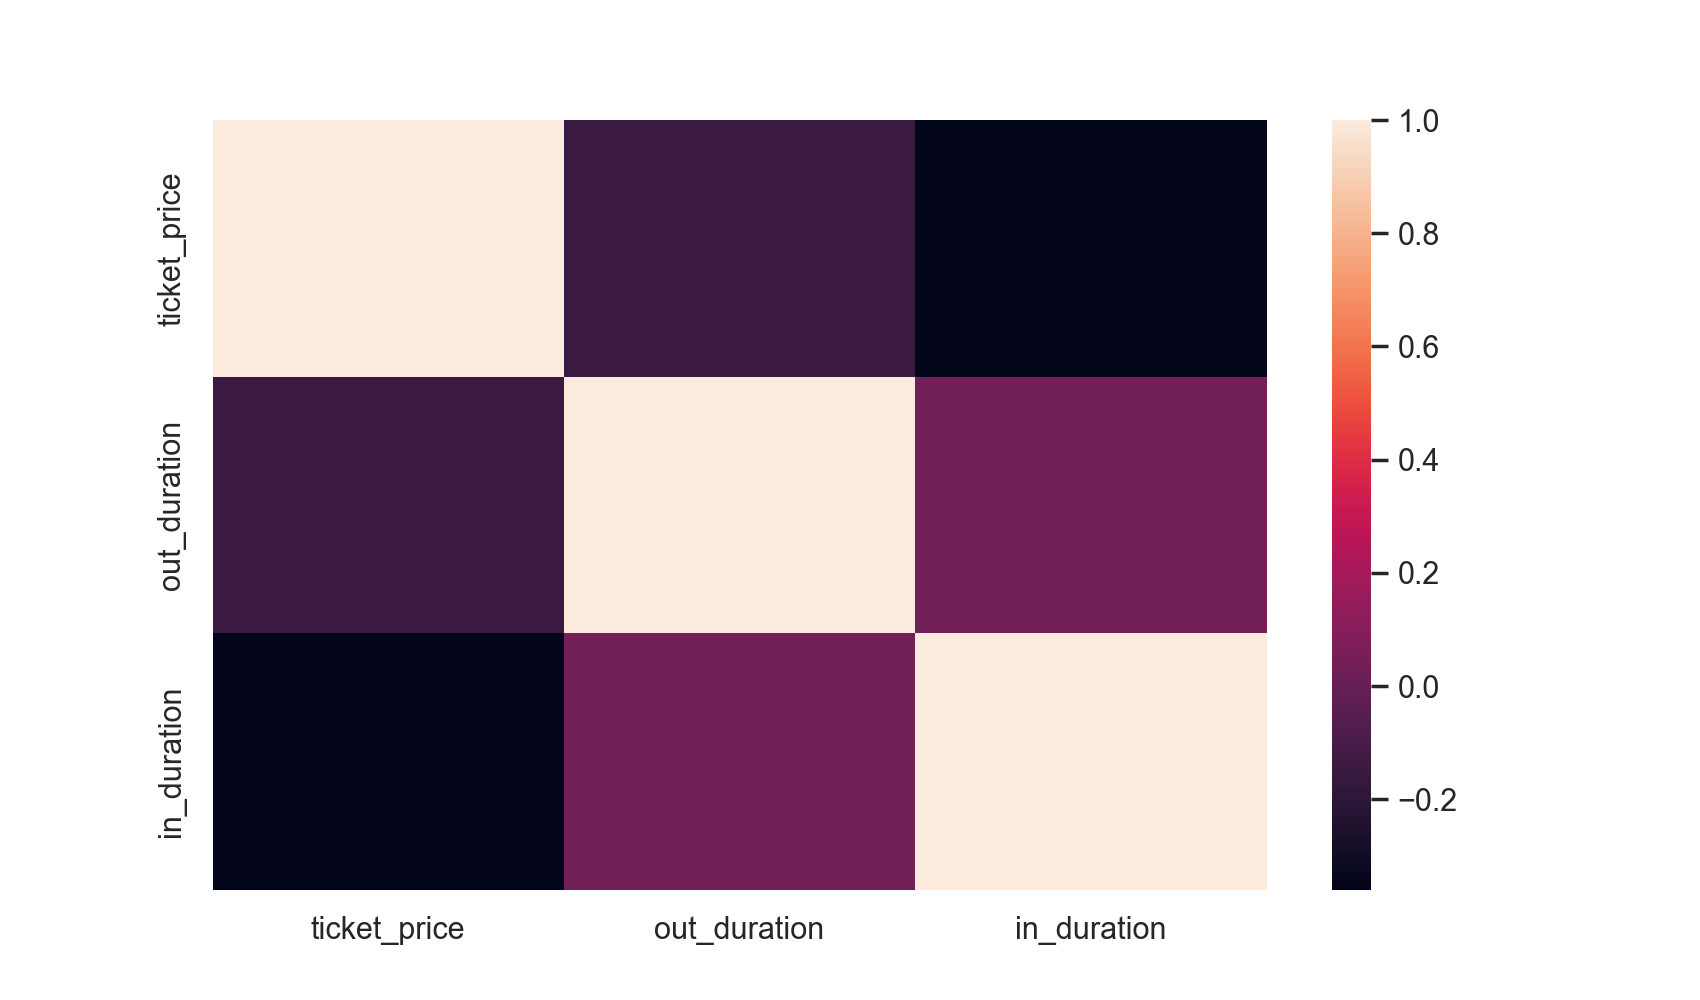

In [29]:
sns.set(rc={'figure.figsize':(8.5,5)})
correlation_matrix = numerical_sao.corr().round(2)
sns.heatmap(correlation_matrix) #annot=True
plt.show()